In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('insurance_data.csv')
#df = pd.read_csv("/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv")
df = df.iloc[:,2:]
df.sample(10)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
739,37.0,male,29.2,109,No,1,No,southwest,10436.10
251,30.0,female,26.6,89,Yes,0,No,southeast,3757.84
627,43.0,male,19.2,99,Yes,1,No,northeast,8627.54
603,39.0,male,19.6,91,Yes,1,No,northwest,8428.07
706,28.0,female,34.2,86,No,1,No,southwest,9872.70
987,37.0,female,21.9,89,Yes,1,Yes,northeast,15359.10
1045,19.0,male,25.3,95,No,2,Yes,southeast,18972.50
916,43.0,female,27.6,105,Yes,0,No,northeast,13217.09
1233,20.0,male,33.6,103,No,1,Yes,northeast,37607.53
1123,60.0,female,30.6,85,No,2,No,northwest,24059.68


In [4]:
df.shape

(1340, 9)

In [5]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


# UniVariant EDA

# Column Types

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

# Age 

- **Missing Values**     3 
- **Shape** Binomial
- **Outliers** No

In [7]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

<AxesSubplot: xlabel='age', ylabel='Count'>

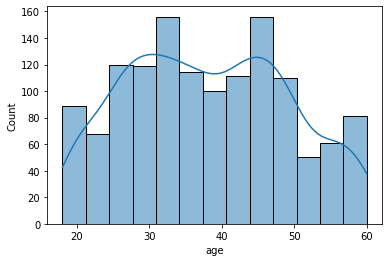

In [8]:
sns.histplot(df['age'],kde=True)

In [9]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [10]:
df['age'].skew()

0.11382341584545372

In [11]:
df['age'].isnull().sum()

0

<AxesSubplot: >

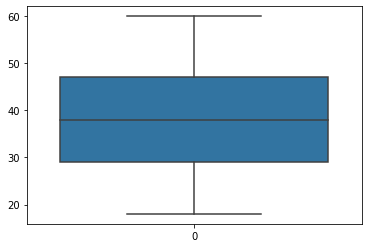

In [12]:
sns.boxplot(df['age'])

In [13]:
df[df['age']<20].shape

(45, 9)

# BMI

- **Missing Values**     0 
- **Shape** Noraml Distriubution
- **Outliers** 4 max 

In [14]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='Count'>

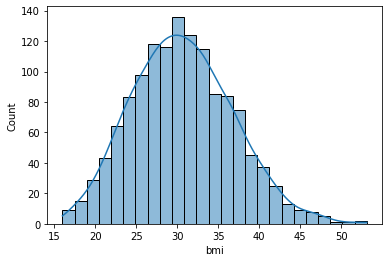

In [15]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot: >

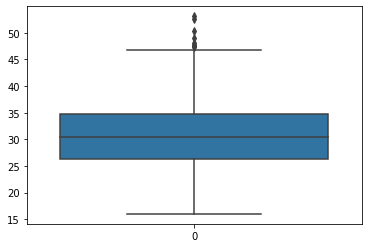

In [16]:
sns.boxplot(df['bmi'])

In [17]:
iqr = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)
upper_limit= df['bmi'].quantile(0.75) + iqr *1.5
df[df['bmi']>upper_limit].shape

(9, 9)

In [18]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])


# After Outlier Detection

<AxesSubplot: >

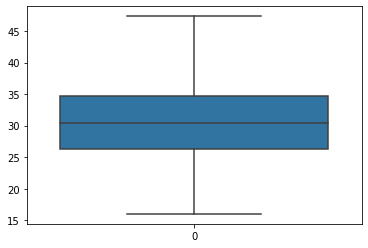

In [19]:
sns.boxplot(df['bmi'])

# Blood Pressure

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [20]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<AxesSubplot: xlabel='bloodpressure', ylabel='Count'>

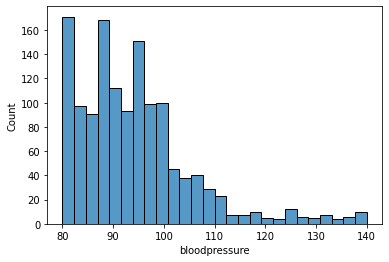

In [21]:
sns.histplot(df['bloodpressure'])

In [22]:
df['bloodpressure'].skew()

1.4835342102293079

<AxesSubplot: >

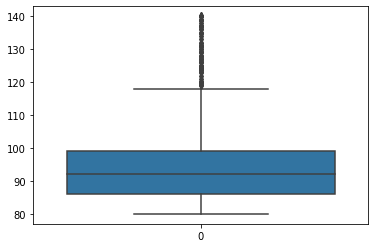

In [23]:
sns.boxplot(df['bloodpressure'])

In [24]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(62, 9)

In [25]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

4.626865671641791

In [26]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])

# After Outlier Detection

<AxesSubplot: >

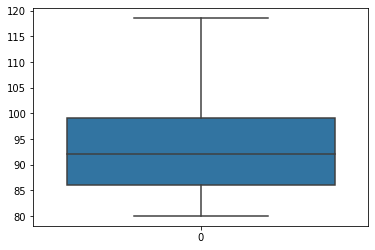

In [27]:
sns.boxplot(df['bloodpressure'])

# claim

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [28]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [29]:
df['claim'].skew()

1.5167468509489237

<AxesSubplot: xlabel='claim', ylabel='Count'>

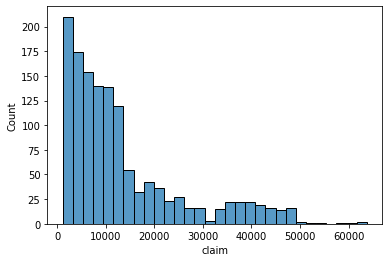

In [30]:
sns.histplot(df['claim'])

<AxesSubplot: >

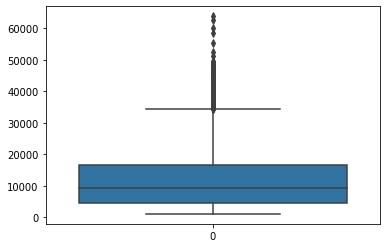

In [31]:
sns.boxplot(df['claim'])

In [32]:
iqr = df['claim'].quantile(0.75) - df['claim'].quantile(0.25)
upper_limit= df['claim'].quantile(0.75) + iqr *1.5
df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])


In [33]:
df[df['claim']>upper_limit].shape[0]/df.shape[0]*100

0.0

# After Handling Outliers

<AxesSubplot: >

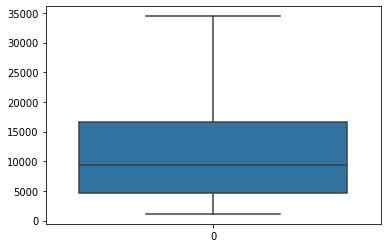

In [34]:
sns.boxplot(df['claim'])

# Univariant Data Aanalysis

# Catagorical Columns

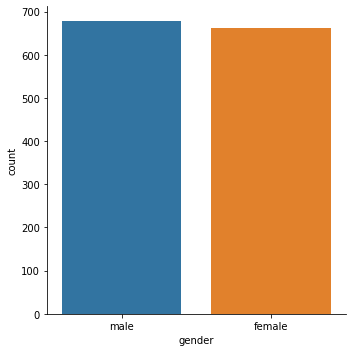

In [38]:
sns.catplot(data=df,x='gender',kind='count')


In [44]:
df.columns

Index(['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

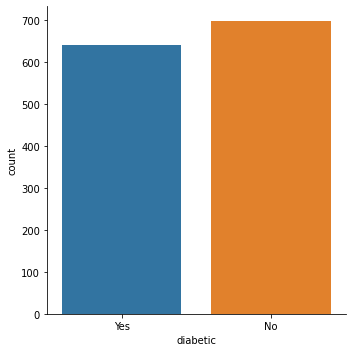

In [39]:
sns.catplot(data=df,x='diabetic',kind='count')

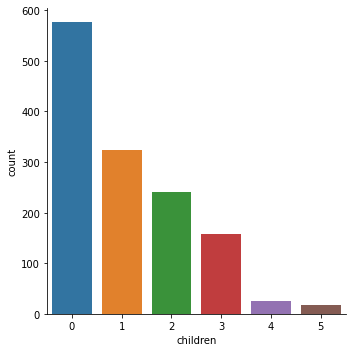

In [40]:
sns.catplot(data=df,x='children',kind='count')

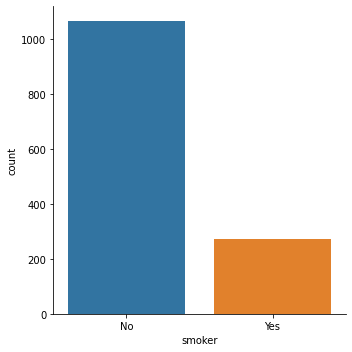

In [41]:
sns.catplot(data=df,x='smoker',kind='count')


In [42]:
df = df[~df['region'].isnull()]

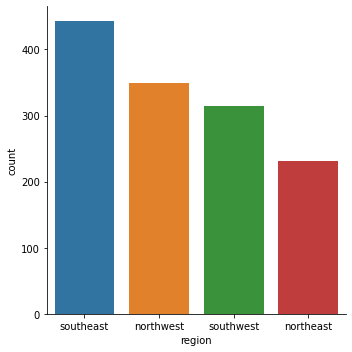

In [43]:
sns.catplot(data=df,x='region',kind='count')

# Bivariant EDA

# Num to Num
- Age with claim
- bmi with claim
- bloodpressure with  claim

In [45]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


<AxesSubplot: xlabel='age', ylabel='claim'>

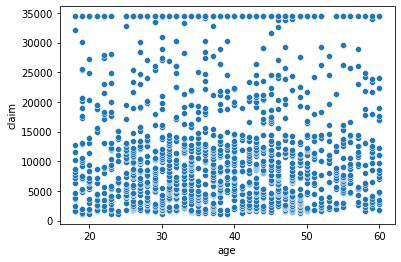

In [48]:
sns.scatterplot(x=df['age'],y=df['claim'])

<AxesSubplot: xlabel='bmi', ylabel='claim'>

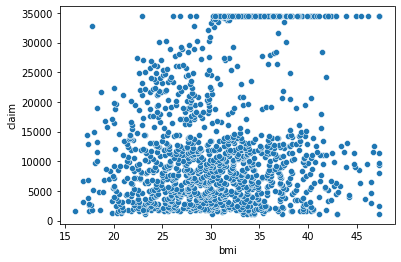

In [49]:
sns.scatterplot(x=df['bmi'],y=df['claim'])

<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

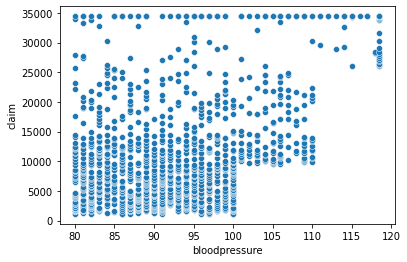

In [50]:
sns.scatterplot(x=df['bloodpressure'],y=df['claim'])

<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

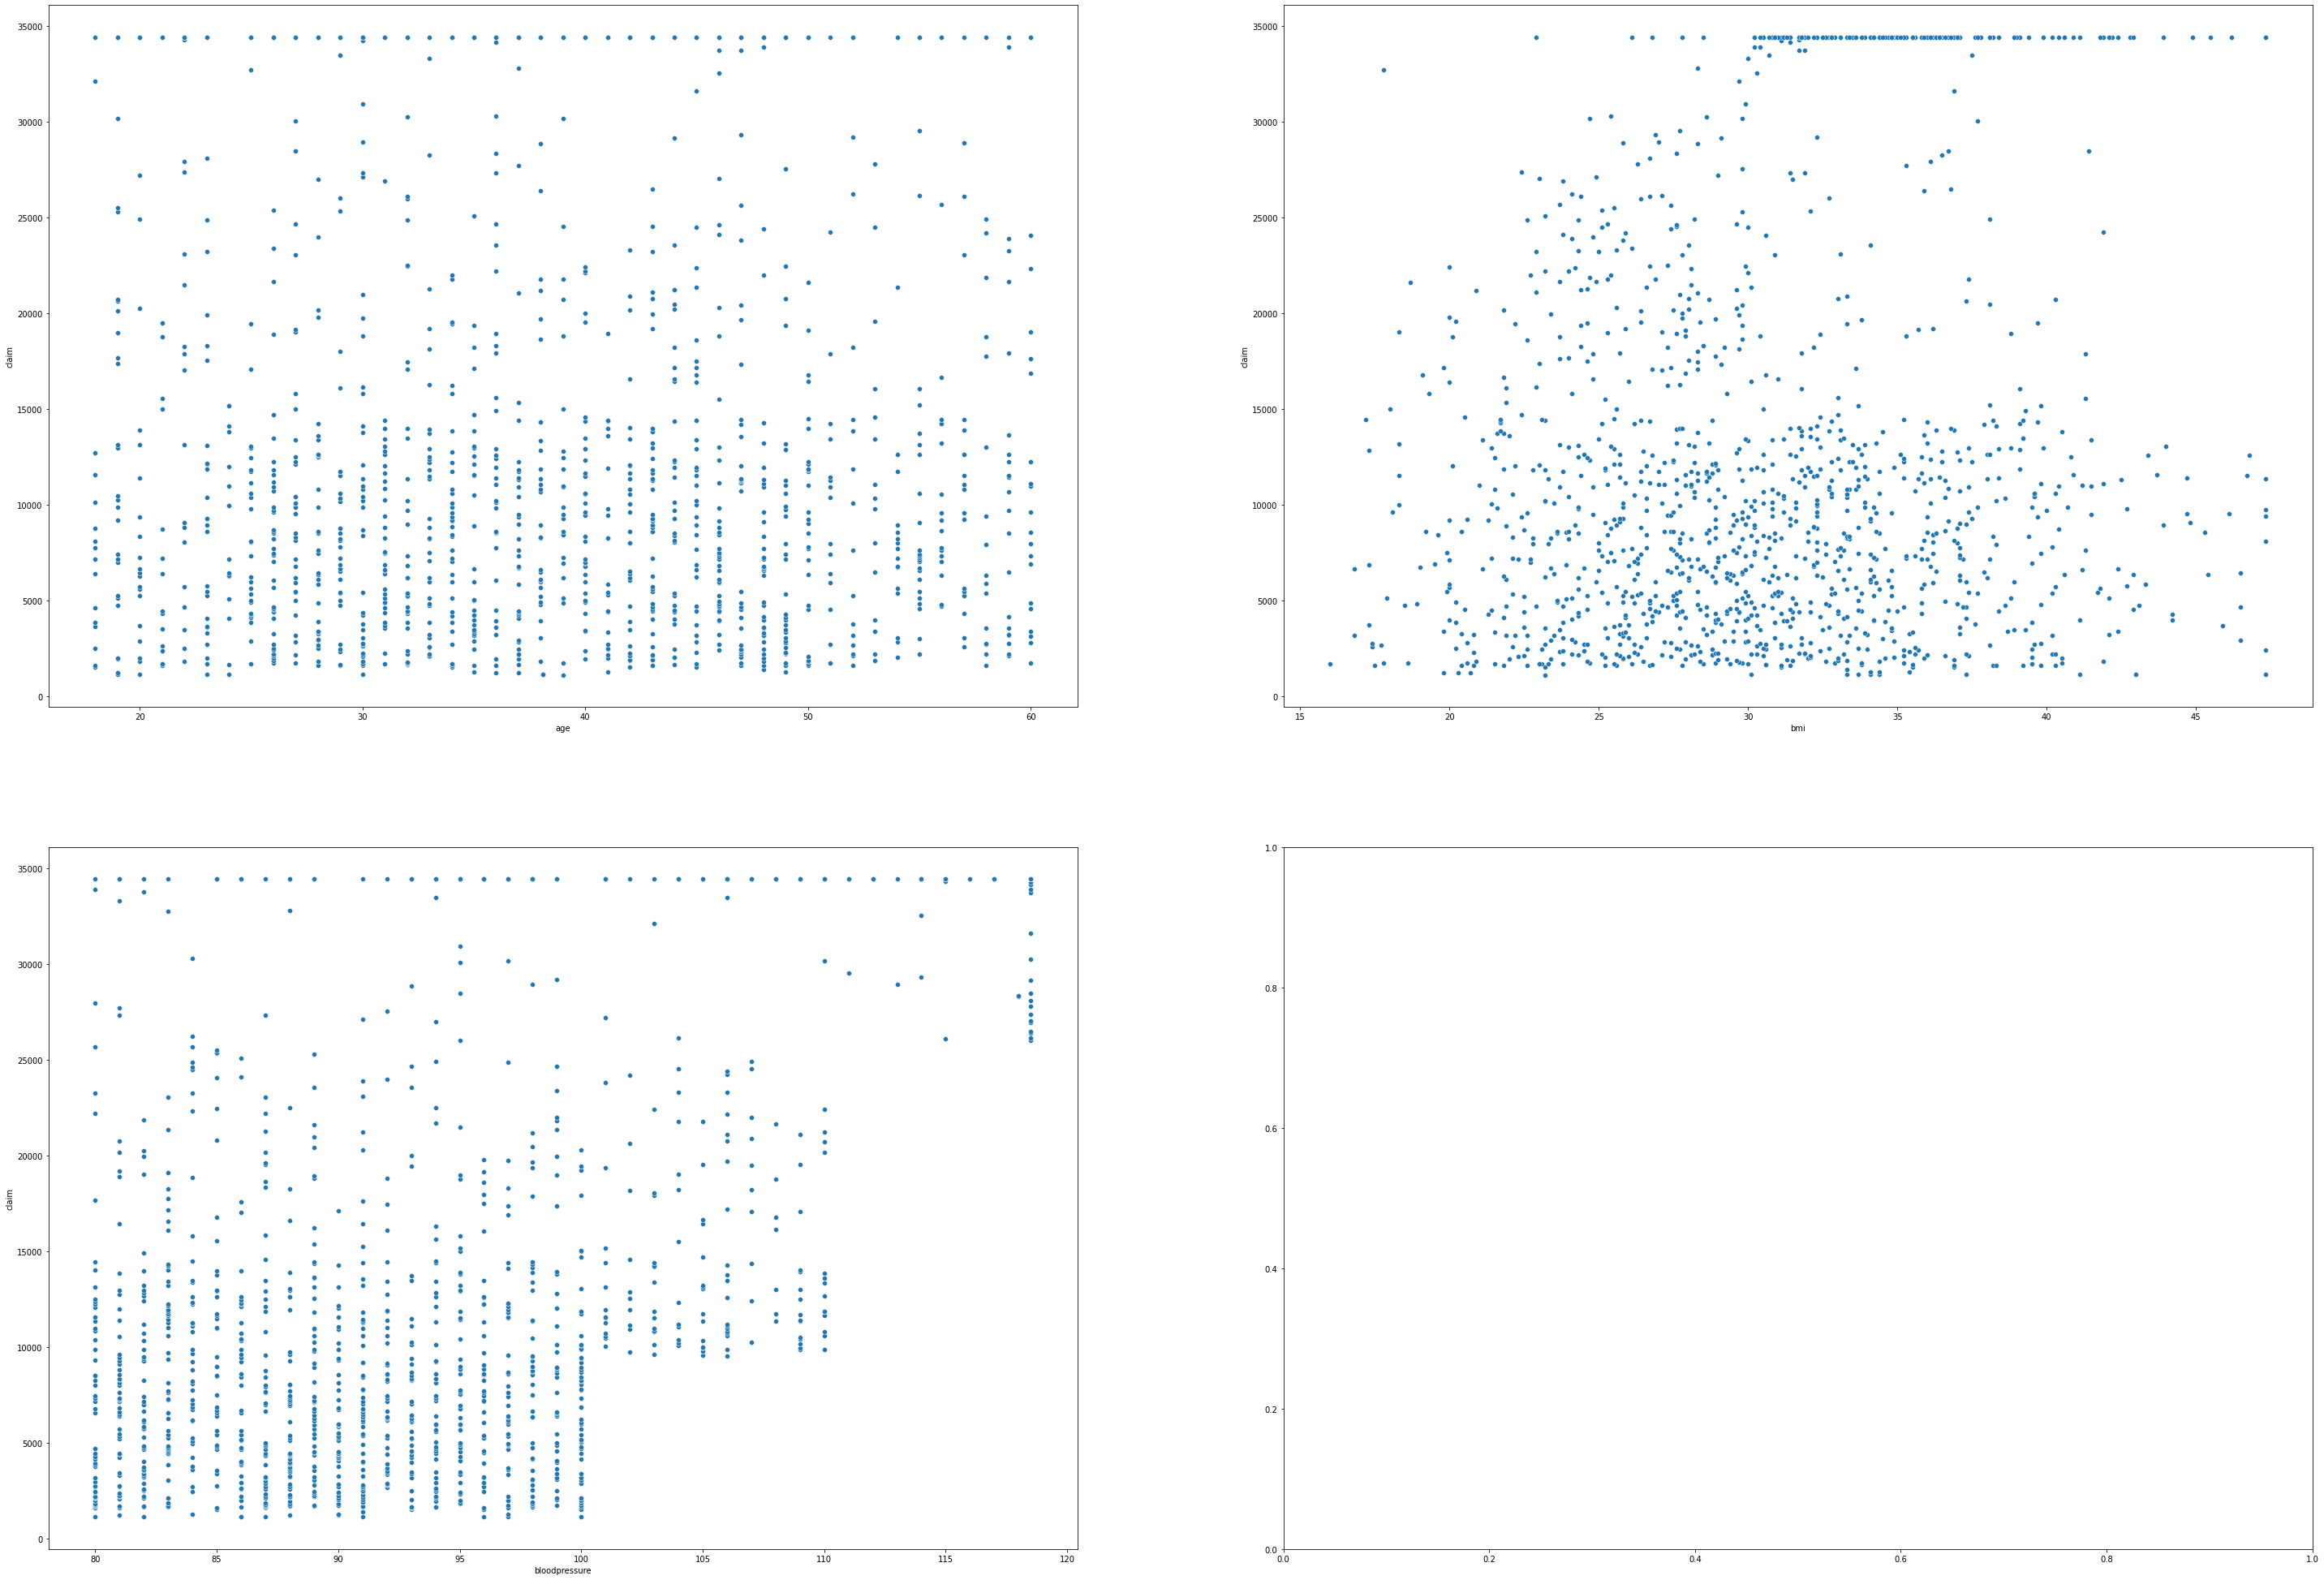

In [51]:
fig = plt.figure(figsize=(50,35))
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)



sns.scatterplot(x=df['age'],y=df['claim'],ax=ax1)
sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax2)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax3)


# Num to Cat

In [52]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2000,91.0,Yes,0,No,southeast,1121.870
1,24.000000,male,30.1000,87.0,No,0,No,southeast,1131.510
2,38.078652,male,33.3000,82.0,Yes,0,No,southeast,1135.940
3,38.078652,male,33.7000,80.0,No,0,No,northwest,1136.400
4,38.078652,male,34.1000,100.0,No,0,No,northwest,1137.010
...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5000,88.0,Yes,0,Yes,northwest,34431.235
1336,59.000000,female,38.1000,118.5,No,1,Yes,northeast,34431.235
1337,30.000000,male,34.5000,91.0,Yes,3,Yes,northwest,34431.235
1338,37.000000,male,30.4000,106.0,No,0,Yes,southeast,34431.235


In [53]:
print(df[df['gender']=='male']['age'].min())
print(df[df['gender']=='male']['age'].max())

18.0
50.0


In [54]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2000,91.0,Yes,0,No,southeast,1121.870
1,24.000000,male,30.1000,87.0,No,0,No,southeast,1131.510
2,38.078652,male,33.3000,82.0,Yes,0,No,southeast,1135.940
3,38.078652,male,33.7000,80.0,No,0,No,northwest,1136.400
4,38.078652,male,34.1000,100.0,No,0,No,northwest,1137.010
...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5000,88.0,Yes,0,Yes,northwest,34431.235
1336,59.000000,female,38.1000,118.5,No,1,Yes,northeast,34431.235
1337,30.000000,male,34.5000,91.0,Yes,3,Yes,northwest,34431.235
1338,37.000000,male,30.4000,106.0,No,0,Yes,southeast,34431.235


# Cat to Cat
- gender with diabetic
- gender with smoker
- gender with region
- diabeticr with smoker
- diabeticr with region
- smoker with region

In [294]:
pd.crosstab(df['gender'],df['diabetic'])

diabetic,No,Yes
gender,,
female,339,323
male,358,317


<AxesSubplot: xlabel='gender', ylabel='diabetic'>

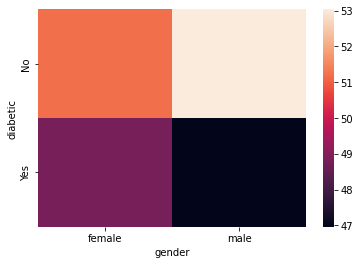

In [295]:
sns.heatmap(pd.crosstab(df['diabetic'],df['gender'],normalize='columns')*100)

In [296]:
pd.crosstab(df['smoker'],df['gender'])

gender,female,male
smoker,,
No,547,516
Yes,115,159


<AxesSubplot: xlabel='gender', ylabel='smoker'>

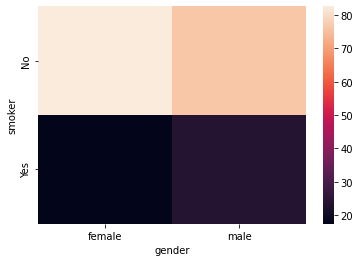

In [297]:
sns.heatmap(pd.crosstab(df['smoker'],df['gender'],normalize='columns',)*100)

In [298]:
pd.crosstab(df['gender'],df['region'])

region,northeast,northwest,southeast,southwest
gender,,,,
female,112,164,224,162
male,119,185,219,152


<AxesSubplot: xlabel='region', ylabel='gender'>

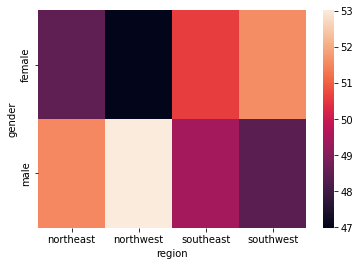

In [299]:
sns.heatmap(pd.crosstab(df['gender'],df['region'],normalize='columns')*100)            

In [300]:
pd.crosstab(df['children'],df['gender'])

gender,female,male
children,,
0,289,284
1,158,166
2,119,121
3,77,80
4,11,14
5,8,10


<AxesSubplot: xlabel='gender', ylabel='children'>

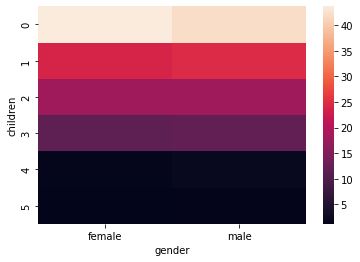

In [301]:
sns.heatmap(pd.crosstab(df['children'],df['gender'],normalize='columns')*100)

In [302]:
pd.crosstab(df['diabetic'],df['smoker'])

smoker,No,Yes
diabetic,,
No,559,138
Yes,504,136


<AxesSubplot: xlabel='smoker', ylabel='diabetic'>

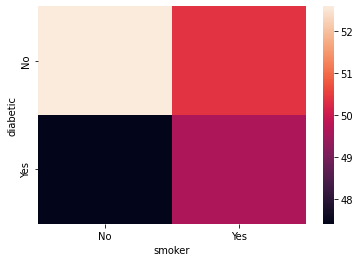

In [303]:
sns.heatmap(pd.crosstab(df['diabetic'],df['smoker'],normalize='columns',)*100)

In [304]:
pd.crosstab(df['diabetic'],df['children'])

children,0,1,2,3,4,5
diabetic,,,,,,
No,291,179,120,83,13,11
Yes,282,145,120,74,12,7


<AxesSubplot: xlabel='diabetic', ylabel='children'>

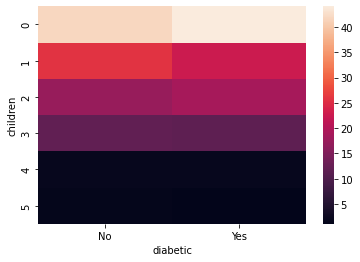

In [305]:
sns.heatmap(pd.crosstab(df['children'],df['diabetic'],normalize='columns',)*100)

In [306]:
pd.crosstab(df['diabetic'],df['region'])

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,110,192,225,170
Yes,121,157,218,144


<AxesSubplot: xlabel='diabetic', ylabel='region'>

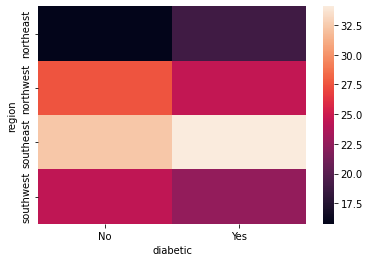

In [307]:
sns.heatmap(pd.crosstab(df['region'],df['diabetic'],normalize='columns')*100)

<AxesSubplot: xlabel='diabetic', ylabel='region'>

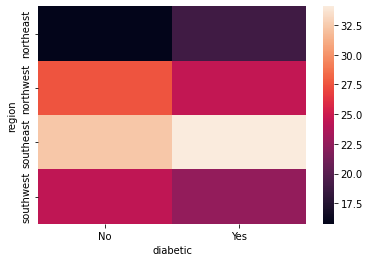

In [308]:
sns.heatmap(pd.crosstab(df['region'],df['diabetic'],normalize='columns')*100)

In [309]:
pd.crosstab(df['children'],df['region'])

region,northeast,northwest,southeast,southwest
children,,,,
0,105,154,186,128
1,57,76,114,77
2,37,66,80,57
3,25,46,49,37
4,6,6,6,7
5,1,1,8,8


<AxesSubplot: xlabel='region', ylabel='children'>

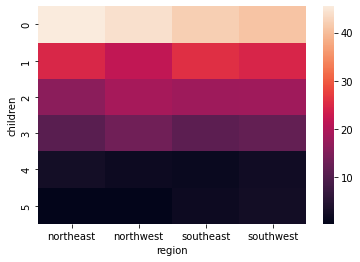

In [310]:
sns.heatmap(pd.crosstab(df['children'],df['region'],normalize='columns')*100)

In [311]:
pd.crosstab(df['children'],df['smoker'])

smoker,No,Yes
children,,
0,458,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


<AxesSubplot: xlabel='smoker', ylabel='children'>

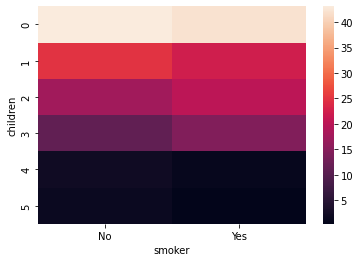

In [312]:
sns.heatmap(pd.crosstab(df['children'],df['smoker'],normalize='columns')*100)

In [313]:
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
No,164,291,352,256
Yes,67,58,91,58


<AxesSubplot: xlabel='region', ylabel='smoker'>

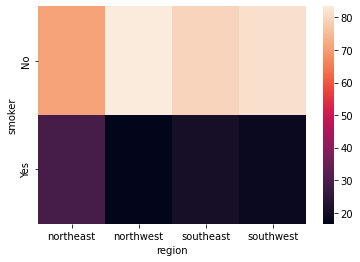

In [314]:
sns.heatmap(pd.crosstab(df['smoker'],df['region'],normalize='columns')*100)

In [315]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


<AxesSubplot: xlabel='gender', ylabel='smoker'>

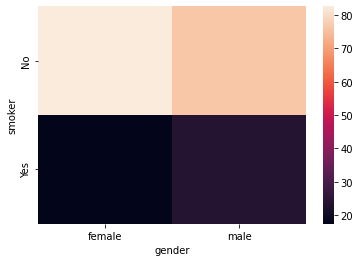

In [316]:
sns.heatmap(pd.crosstab(df['smoker'],df['gender'],normalize='columns')*100)

In [317]:
pd.crosstab(df['gender'],df['smoker'])

smoker,No,Yes
gender,,
female,547,115
male,516,159


<AxesSubplot: xlabel='gender', ylabel='count'>

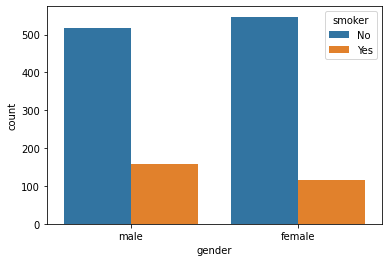

In [318]:
sns.countplot(x=df['gender'],hue=df['smoker'])

<AxesSubplot: xlabel='smoker', ylabel='gender'>

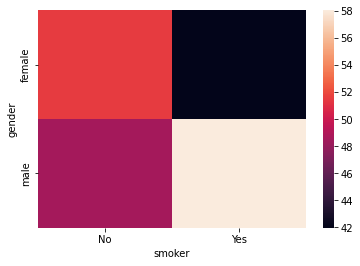

In [319]:
sns.heatmap(pd.crosstab(df['gender'],df['smoker'],normalize='columns')*100)

In [320]:
pd.crosstab(df['gender'],df['smoker'],normalize='columns')*100

smoker,No,Yes
gender,,
female,51.458137,41.970803
male,48.541863,58.029197


In [321]:
print(df[df['gender']=='female']['bmi'].mean())
print(df[df['gender']=='male']['bmi'].mean())

30.378115558912388
30.936185185185185


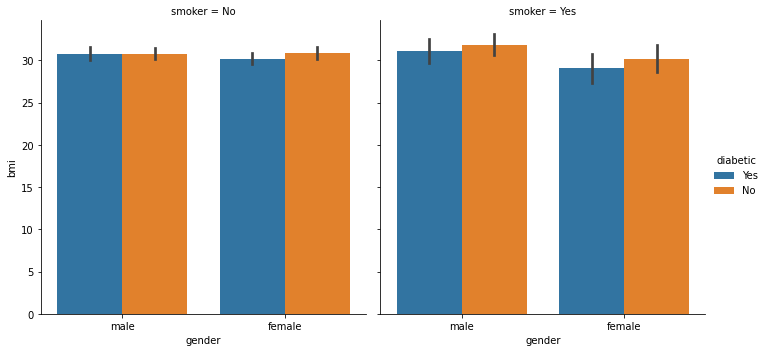

In [322]:
sns.catplot(data=df,x='gender',y='bmi',kind='bar',col='smoker',hue='diabetic')

In [323]:
df.sample(10)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
162,47.0,male,17.7,92.0,Yes,0,No,northwest,2680.950
1040,46.0,male,35.3,89.0,No,2,No,southeast,18806.150
384,41.0,female,26.3,82.0,Yes,3,No,northwest,5312.170
87,37.0,male,25.8,86.0,No,0,No,northwest,1972.950
1147,29.0,female,32.7,118.5,Yes,2,No,northwest,26018.950
1236,48.0,male,27.8,81.0,Yes,0,Yes,southwest,34431.235
1114,43.0,female,22.9,84.0,Yes,1,Yes,southeast,23244.790
632,18.0,male,32.3,98.0,Yes,1,No,northwest,8765.250
512,46.0,male,34.3,89.0,No,1,No,southeast,7147.470
886,31.0,female,33.8,86.0,Yes,2,No,northwest,12643.380


<AxesSubplot: xlabel='gender', ylabel='bmi'>

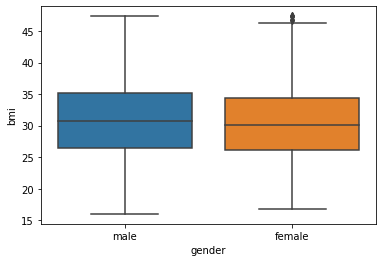

In [324]:
sns.boxplot(x=df['gender'],y=df['bmi'])

<AxesSubplot: xlabel='gender', ylabel='bmi'>

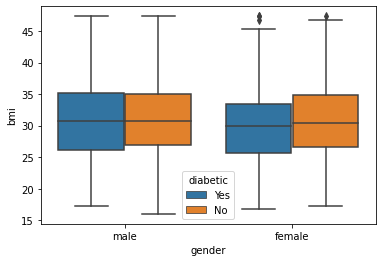

In [325]:
sns.boxplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'])

<AxesSubplot: xlabel='gender', ylabel='bmi'>

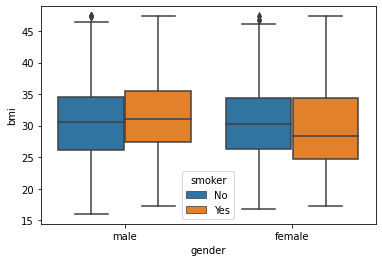

In [326]:
sns.boxplot(x=df['gender'],y=df['bmi'],hue=df['smoker'])

<AxesSubplot: xlabel='gender', ylabel='bmi'>

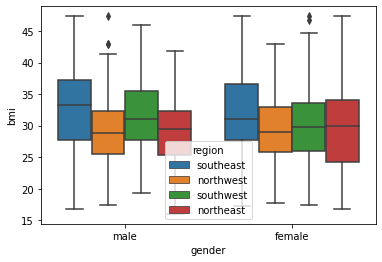

In [327]:
sns.boxplot(x=df['gender'],y=df['bmi'],hue=df['region'])

<AxesSubplot: xlabel='gender', ylabel='bmi'>

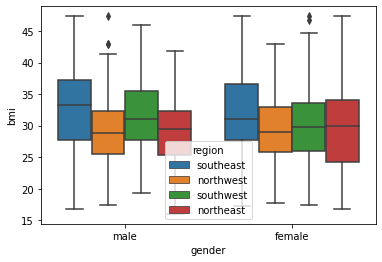

In [328]:
sns.boxplot(x=df['gender'],y=df['bmi'],hue=df['region'])

<AxesSubplot: xlabel='gender', ylabel='bmi'>

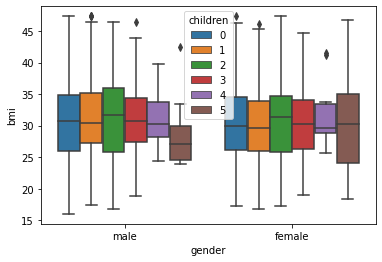

In [329]:
sns.boxplot(x=df['gender'],y=df['bmi'],hue=df['children'])

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

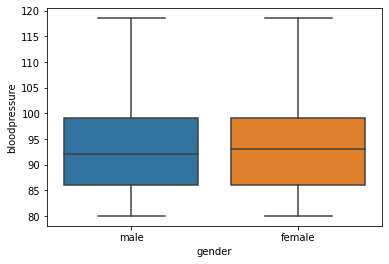

In [330]:
sns.boxplot(x=df['gender'],y=df['bloodpressure'])

<AxesSubplot: xlabel='diabetic', ylabel='bmi'>

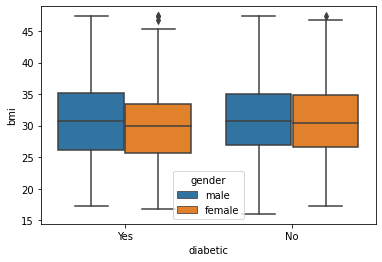

In [331]:
sns.boxplot(x=df['diabetic'],y=df['bmi'],hue=df['gender'])

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

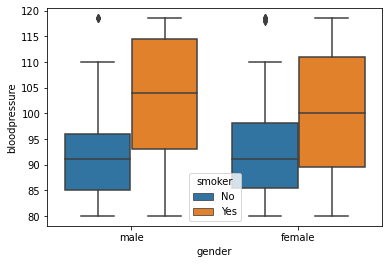

In [332]:
sns.boxplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'])

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

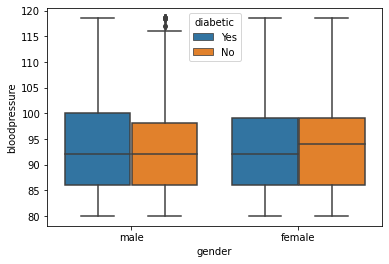

In [333]:
sns.boxplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'])

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

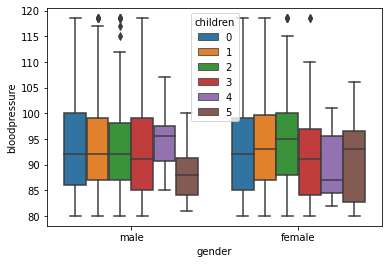

In [334]:
sns.boxplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'])

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

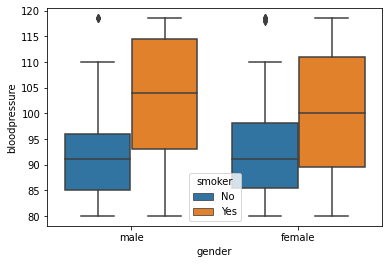

In [335]:
sns.boxplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'])

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

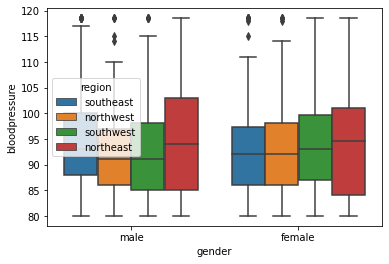

In [336]:
sns.boxplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'])

<AxesSubplot: xlabel='smoker', ylabel='bloodpressure'>

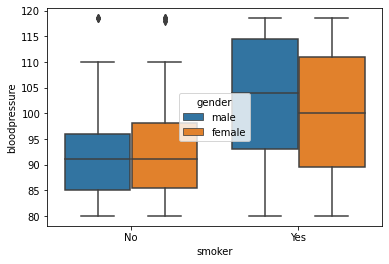

In [337]:
sns.boxplot(x=df['smoker'],y=df['bloodpressure'],hue=df['gender'])

<AxesSubplot: xlabel='smoker', ylabel='bmi'>

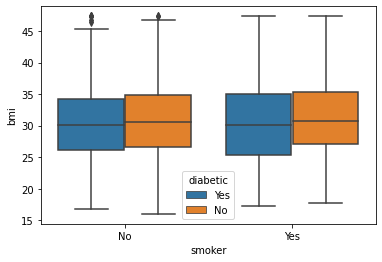

In [338]:
sns.boxplot(x=df['smoker'],y=df['bmi'],hue=df['diabetic'])

<AxesSubplot: xlabel='diabetic', ylabel='bloodpressure'>

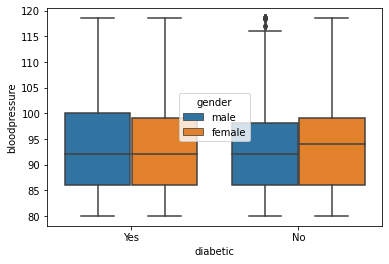

In [339]:
sns.boxplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['gender'])

In [340]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


In [341]:
df[df['smoker']=='Yes']['bloodpressure'].describe()

count    274.000000
mean     101.490876
std       12.589930
min       80.000000
25%       91.000000
50%      101.000000
75%      114.000000
max      118.500000
Name: bloodpressure, dtype: float64

<AxesSubplot: xlabel='gender', ylabel='claim'>

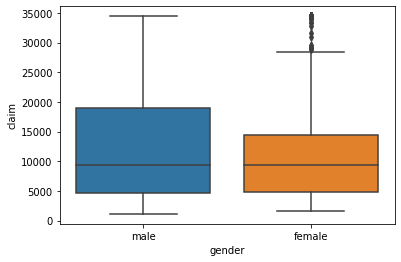

In [342]:
sns.boxplot(x=df['gender'],y=df['claim'])

<AxesSubplot: xlabel='gender', ylabel='claim'>

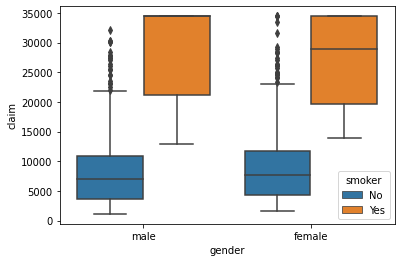

In [343]:
sns.boxplot(x=df['gender'],y=df['claim'],hue=df['smoker'])

<AxesSubplot: xlabel='gender', ylabel='claim'>

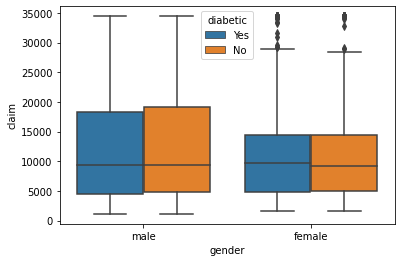

In [344]:
sns.boxplot(x=df['gender'],y=df['claim'],hue=df['diabetic'])

<AxesSubplot: xlabel='gender', ylabel='claim'>

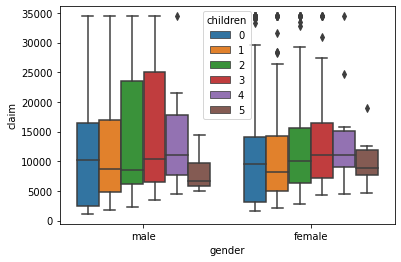

In [345]:
sns.boxplot(x=df['gender'],y=df['claim'],hue=df['children'])

In [380]:
df.corr()['claim']

age                -0.030582
bmi                 0.159235
bloodpressure       0.507629
children            0.072409
claim               1.000000
gender_male         0.053116
region_northwest   -0.078739
region_southeast   -0.032343
region_southwest   -0.024562
smoker_Yes          0.785853
diabetic_Yes       -0.004471
Name: claim, dtype: float64

<AxesSubplot: >

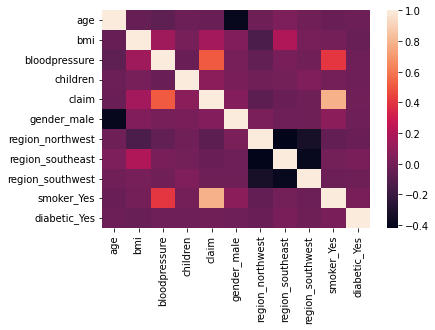

In [378]:
sns.heatmap(df.corr())

In [348]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


In [349]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2000,91.0,Yes,0,No,southeast,1121.870
1,24.000000,male,30.1000,87.0,No,0,No,southeast,1131.510
2,38.078652,male,33.3000,82.0,Yes,0,No,southeast,1135.940
3,38.078652,male,33.7000,80.0,No,0,No,northwest,1136.400
4,38.078652,male,34.1000,100.0,No,0,No,northwest,1137.010
...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5000,88.0,Yes,0,Yes,northwest,34431.235
1336,59.000000,female,38.1000,118.5,No,1,Yes,northeast,34431.235
1337,30.000000,male,34.5000,91.0,Yes,3,Yes,northwest,34431.235
1338,37.000000,male,30.4000,106.0,No,0,Yes,southeast,34431.235


# Feature Engineering

In [350]:
#df=df.drop(columns=['gender','age','children'])
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2000,91.0,Yes,0,No,southeast,1121.870
1,24.000000,male,30.1000,87.0,No,0,No,southeast,1131.510
2,38.078652,male,33.3000,82.0,Yes,0,No,southeast,1135.940
3,38.078652,male,33.7000,80.0,No,0,No,northwest,1136.400
4,38.078652,male,34.1000,100.0,No,0,No,northwest,1137.010
...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5000,88.0,Yes,0,Yes,northwest,34431.235
1336,59.000000,female,38.1000,118.5,No,1,Yes,northeast,34431.235
1337,30.000000,male,34.5000,91.0,Yes,3,Yes,northwest,34431.235
1338,37.000000,male,30.4000,106.0,No,0,Yes,southeast,34431.235


In [351]:
df['claim'].describe()

count     1337.000000
mean     12481.944080
std      10143.761844
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      34431.235000
Name: claim, dtype: float64

In [352]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


In [353]:
from sklearn.preprocessing import RobustScaler

In [354]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.01


In [56]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.01


In [57]:
df= pd.get_dummies(df,columns=['gender','region','smoker','diabetic'],drop_first=True)
df.sample(10)

,age,bmi,bloodpressure,children,claim,gender_male,region_northwest,region_southeast,region_southwest,smoker_Yes,diabetic_Yes
1011,32.0,26.8,109.0,1,17085.27,0,0,1,0,1,0
72,22.0,34.4,98.0,0,1826.84,1,0,0,1,0,1
1097,39.0,37.4,99.0,0,21797.00,1,0,0,1,0,1
542,19.0,32.6,94.0,2,7441.50,1,0,0,1,0,1
587,54.0,27.7,100.0,1,8232.64,0,0,1,0,0,0
984,24.0,33.7,101.0,3,15161.53,1,0,1,0,0,0
988,46.0,25.2,104.0,0,15518.18,1,0,0,0,1,1
567,50.0,40.2,91.0,0,7804.16,1,0,1,0,0,1
945,57.0,36.9,88.0,0,13887.97,0,0,1,0,0,1
1067,40.0,27.8,93.0,1,20009.63,1,1,0,0,1,0


In [58]:
df.shape

(1337, 11)

In [59]:
x = df.drop(columns=['claim'])
y = df['claim']

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [61]:
trsf = ColumnTransformer(transformers=[
    ('standard_scaler',StandardScaler(),['age','bmi','bloodpressure'])
    
],remainder='passthrough')

#    ('robust_scaler',StandardScaler



In [62]:
x_train_transform = trsf.fit_transform(x_train)
x_test_transform = trsf.transform(x_test)

In [70]:
from sklearn.linear_model import Ridge

In [71]:
lr = LinearRegression()

In [78]:
lr = Ridge(alpha=10)

# lr.fit(x_train_transform,y_train)

In [80]:
y_pred = lr.predict(x_test_transform)
y_pred

array([ 9573.14362146,  6036.42901426,  7607.43829806,  8686.14624707,
        4942.95755861,  6475.59974845,  9822.75911835,  6783.67196933,
        7776.92920981,  4890.55873047, 23538.73610958,  5509.55761637,
       12745.79453395, 13247.07711391, 11259.26426782, 18091.79876839,
        4360.357036  ,  9295.18287761,  8746.60891747,  6221.49160596,
       11463.89092346,  9349.95415171, 24447.56585068, 26484.71660785,
        7400.7824373 , 11187.34576699,  6099.29612685,  9693.93857926,
       25953.42002851, 14088.62918639,  7212.38644587, 12335.58410732,
       10155.4400258 ,  9020.43447148,  4167.95250803, 27241.56930614,
        8161.55573254,  8867.27257052, 25791.51694858,  6166.80951799,
       11864.86514544,  5165.58060451, 11932.78635804, 24148.23535492,
        8263.00645677,  7318.52752259,  6589.85726722,  5027.4519208 ,
        6581.00022637, 34320.17365375, 13553.35011935,  8846.54813498,
        9472.56399006,  8210.94668306,  6069.07008   , 24982.62468133,
      

In [81]:
import sklearn.metrics as mse

In [82]:
print('mean_absolute_error',mse.mean_absolute_error(y_test,y_pred))

mean_absolute_error 4587.517469671541


In [83]:
print('r2_score',mse.r2_score(y_test,y_pred))

r2_score 0.6258011969594415


In [422]:
output = pd.DataFrame(y_pred,y_test,columns=['Actual','Predicted'])
output

,0
claim,
21344.850,7589.626757
9225.260,8232.188796
34431.235,28125.098743
27037.910,28154.910631
34431.235,27142.027343
...,...
4337.740,6104.351425
4320.410,8461.694469
23306.550,27956.011286


In [423]:
trsf = ColumnTransformer(transformers=[
    ('standard_scaler',StandardScaler(),['age','bmi','bloodpressure'])
    
],remainder='passthrough')

#    ('robust_scaler',StandardScaler



In [424]:
lr = LinearRegression()

In [425]:
lr.fit(x_train,y_train)

LinearRegression()

In [426]:
y_pred = lr.predict(x_test)

In [427]:
y_pred

array([ 7589.62675679,  8232.18879556, 28125.09874319, 28154.91063077,
       27142.02734252,  9725.63507217, 12451.85117776,  7673.52742638,
       11206.38341298,  8496.44942968,  9435.20906595,  3936.09270772,
        8584.52814604,  4125.60524972,  9352.31836559,  6302.15276826,
       11210.97216794, 31565.24190427, 32132.9526327 , 26871.79316346,
       25107.10503117,  4690.90098193,  8016.18548837, 10855.8899731 ,
        7447.65710986,  8774.70891707,  7423.35517387,  6406.58056176,
        6939.66981454, 13199.17318907,  7570.35705993,  7114.97637707,
        8035.96641562,  6909.16831209,  9738.25250045,  9382.07468539,
        6735.91718131,  6133.50408165, 29602.62260679, 10991.91087673,
        7879.9405841 , 16474.27657727, 11911.83339498,  9740.76669244,
        6853.02599528, 29437.04516593,  7890.77983498,  7587.80982644,
       10241.31253577, 30453.55800829, 12218.75464515, 31845.99698537,
       34625.01687831, 27403.82313401, 15118.41845686, 12640.0557134 ,
      

In [428]:
print('mean_absolute_error',mse.mean_absolute_error(y_test,y_pred))
print('r2_score',mse.r2_score(y_test,y_pred))

mean_absolute_error 4231.666233015096
r2_score 0.7106719356319512
